<a href="https://colab.research.google.com/github/oliva0620/23bigdata_exam/blob/cs/%5BML_03%5D_classification_Teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.이항분류
- 합격/불합격 판정
- 3과목의 평균 60점 이상 합격, 과락 40점미만

### 1-01. 함수 생성

In [ ]:
# 사용할 라이브러리 import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# sample로 사용할 DataSet을 생성하는 함수 작성
# X: 국어, 영어, 수학 점수
# Y: 합격여부 (X의 평균 60이상, 과락 40점 미만)

# seedno : 랜덤 수 생성 규칙
# size : 랜덤 수 생성 행의 수
# step=0 (균형), step=다른수 (불균형)
def make_sample(seedno, size, step=0):
    colnames = ['국어', '영어', '수학']
    np.random.seed(seedno)
    A = np.random.randint(0, 101, (size, 3))
    df = pd.DataFrame(A, columns=colnames)
    df['합격여부'] = (df.mean(axis=1) >=60) & (df.min(axis=1) >= 40)
    if step == 0:
        F, T = df['합격여부'].value_counts()   #  합격, 불합격의 개수
        B = np.random.randint(60, 101, (F-T, 3))
        df2 = pd.DataFrame(B, columns=colnames)
        df2['합격여부'] = True
        df = pd.concat([df, df2])
        df['합격여부'].value_counts()
        df.index = pd.RangeIndex(len(df))
    df['합격여부'] = df['합격여부'].replace({True:1, False:0})  # 합격:1, 불합격:0
    return df

In [ ]:
# 균형 데이터
data = make_sample(1234, 1000)
data['합격여부'].value_counts()

0    814
1    814
Name: 합격여부, dtype: int64

In [ ]:
# 불균형 데이터
data = make_sample(1234, 1000, step=1)
data['합격여부'].value_counts()

0    814
1    186
Name: 합격여부, dtype: int64

In [ ]:
# 모델 학습 및 성능 평가 함수 생성
def ModelTrain(model, data):
    # 1) X, Y 데이터 분리
    Y = data['합격여부']
    X = data.drop(columns=['합격여부'])   # data에서 '합격여부' 컬럼을 제외한 모든 컬럼을 X로 사용함

    # 2) 학습, 평가 데이터로 분리
    x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                        test_size=0.2,
                                                        stratify=Y,
                                                        random_state=0)

    # 3) 분리된 데이터의 shape 출력
    print([ x.shape for x in [x_train, x_test, y_train, y_test]])
    #print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

    # 4) 학습 모델 선택, 학습
    #model = LogisticRegression(max_iter=1000)  
    model.fit(x_train, y_train)

    # 5) 성능평가 - 정확도(Accuracy)
    # train, test 성능을 모두 확인하여 과대적합 여부 확인
    print('train 성능 :', model.score(x_train, y_train))
    print('test  성능 :', model.score(x_test, y_test))
    return model

### 1-02. 데이터의 중요성

In [ ]:
# 충분한 데이터가 필요한 이유를 알아보겠습니다.

In [ ]:
# 균형 데이터   # 1234, 1225, 1245
for no in [1234, 1225, 1245] :
    model1 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=20000)
    ModelTrain(model1, data)

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.949701652386781
test  성능 : 0.9475214198286414
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9479039167686658
test  성능 : 0.9495104039167687
[(26088, 3), (6522, 3), (26088,), (6522,)]
train 성능 : 0.9467187979147501
test  성능 : 0.9385157927016252


In [ ]:
# 불균형 데이터
for no in [1234, 1225, 1245] :
    model2 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=32000, step=1)
    ModelTrain(model2, data)

[(25600, 3), (6400, 3), (25600,), (6400,)]
train 성능 : 0.9219921875
test  성능 : 0.92546875
[(25600, 3), (6400, 3), (25600,), (6400,)]
train 성능 : 0.9214453125
test  성능 : 0.9153125
[(25600, 3), (6400, 3), (25600,), (6400,)]
train 성능 : 0.9201171875
test  성능 : 0.92015625


In [ ]:
# 부족한 데이터   # 1234, 1225, 1245
for no in [1234, 1225, 1245] :
    model3 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=40)
    ModelTrain(model3, data)

[(52, 3), (14, 3), (52,), (14,)]
train 성능 : 1.0
test  성능 : 1.0
[(51, 3), (13, 3), (51,), (13,)]
train 성능 : 0.9411764705882353
test  성능 : 0.8461538461538461
[(57, 3), (15, 3), (57,), (15,)]
train 성능 : 1.0
test  성능 : 0.8666666666666667


In [ ]:
# 부족한, 불균형 데이터 # 1234, 1225, 1245
for no in [1234, 1225, 1245] :
    model4 = LogisticRegression(max_iter=1000)
    data = make_sample(no, 60, step=1)
    ModelTrain(model4, data)

[(48, 3), (12, 3), (48,), (12,)]
train 성능 : 1.0
test  성능 : 1.0
[(48, 3), (12, 3), (48,), (12,)]
train 성능 : 0.8541666666666666
test  성능 : 0.8333333333333334
[(48, 3), (12, 3), (48,), (12,)]
train 성능 : 0.9583333333333334
test  성능 : 0.8333333333333334


### 1-03. 파생변수 사용
- 합격/불합격 여부를 결정하는 평균, 과락에 관련된 파생변수를 추가하여 봅니다.

In [ ]:
# 데이터 생성
data = make_sample(seedno=1245, size=20000)
data.head(2)

,국어,영어,수학,합격여부
0,37,75,3,0
1,21,32,70,0


In [ ]:
# 파생변수 생성/추가
data['평균'] = data[['국어', '영어', '수학']].mean(axis=1)
data['최저'] = data[['국어', '영어', '수학']].min(axis=1)
data.head(2)

,국어,영어,수학,합격여부,평균,최저
0,37,75,3,0,38.333333,3
1,21,32,70,0,41.000000,21


In [ ]:
for no in [1234, 1225, 1245] :
    model5 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=20000)
    data['평균'] = data[['국어', '영어', '수학']].mean(axis=1)
    data['최저'] = data[['국어', '영어', '수학']].min(axis=1)
    ModelTrain(model5, data)

[(26144, 5), (6536, 5), (26144,), (6536,)]
train 성능 : 0.9855416156670747
test  성능 : 0.9871481028151775
[(26144, 5), (6536, 5), (26144,), (6536,)]
train 성능 : 0.9861153610771114
test  성능 : 0.9840881272949816
[(26088, 5), (6522, 5), (26088,), (6522,)]
train 성능 : 0.9863922109782275
test  성능 : 0.9849739343759583


In [ ]:
# 모든 값을 사용한 예측 결과
def make_all():
    colnames = ['국어', '영어', '수학']
    data = [[kor, eng, mat] for kor in range(101) for eng in range(101) for mat in range(101)]
    data = pd.DataFrame(data, columns=colnames)
    data['평균'] = data[['국어', '영어', '수학']].mean(axis=1)
    data['최저'] = data[['국어', '영어', '수학']].min(axis=1)
    data['합격여부'] = (data['평균'] >=60) & (data['최저'] >= 40)
    data['합격여부'] = data['합격여부'].replace({True:1, False:0})  # 합격:1, 불합격:0
    return data

In [ ]:
data = make_all()
X1 = data.iloc[:, :3]
X2 = data.drop(columns=['합격여부'])
Y = data['합격여부']
print(Y.value_counts())

for x in model1, model2, model3, model4:
    print(x.score(X1, Y))
print(model5.score(X2, Y)) 

0    841140
1    189161
Name: 합격여부, dtype: int64
0.9204543138364419
0.9214792570326535
0.912767239864855
0.90907899730273
0.9764767771748256


### 1-04. 스케일러 사용

In [ ]:
for no in [1234, 1225, 1245] :
    model6 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=20000)
    data['국어'] *= 500
    data['수학'] *= 1000
    ModelTrain(model6, data)

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.5
test  성능 : 0.5
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.5
test  성능 : 0.5
[(26088, 3), (6522, 3), (26088,), (6522,)]
train 성능 : 0.5
test  성능 : 0.5


In [ ]:
# StancardScaler 사용하여 정규 분포 만들기
from sklearn.preprocessing import StandardScaler

for no in [1234, 1225, 1245]:
    model7 = LogisticRegression(max_iter=1000)
    data = make_sample(seedno=no, size=20000)
    data['국어'] *= 500
    data['수학'] *= 1000    
    X = data[['국어', '영어', '수학']]
    Y = data['합격여부']
    scaledX = StandardScaler().fit_transform(X)
    scaledX = pd.DataFrame(scaledX, columns=['국어', '영어', '수학'])
    data = pd.concat([scaledX, Y], axis=1)
    ModelTrain(model7, data)

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9497399020807834
test  성능 : 0.9475214198286414
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9478656670746634
test  성능 : 0.9495104039167687
[(26088, 3), (6522, 3), (26088,), (6522,)]
train 성능 : 0.9468721251149954
test  성능 : 0.9386691199018706


### 1-05. 다양한 모델의 사용

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### A) **데이터 생성**

In [ ]:
# 학습용 데이터
data = make_sample(seedno=1234, size=20000)

# 평가용 데이터
all = make_all()
X = all.iloc[:, :3]
Y = all['합격여부']

#### B) **LogisticRegression**
- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
- https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80
- 반복하면서 기울기 값을 갱신, 기울기 미분값이 0이 되는 지점을 찾음  
- max_iter, tol 등을 변경하여 성능을 개선할 수 있음
- max_iter : 반복횟수
- tol : 허용오차, 반복을 중단하는 조건으로 사용됨
- panalty : panalty 종류
- C : panalty 세기
- (penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

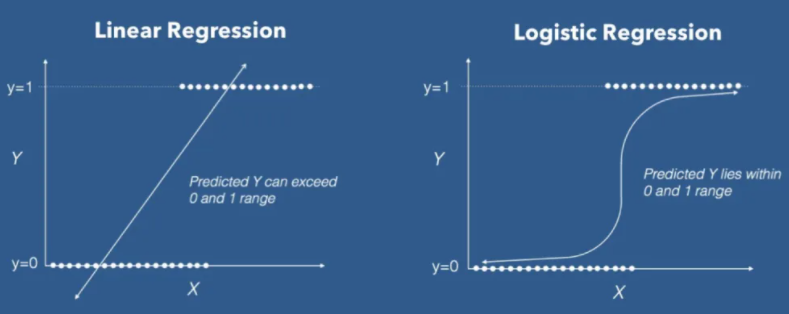

In [ ]:
help(LogisticRegression)

In [ ]:
model_lr = LogisticRegression(max_iter=1000)
ModelTrain(model_lr, data)
print(model_lr.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.949701652386781
test  성능 : 0.9475214198286414
0.9202786370196671


#### C) **KNeighborsClassifier**
- k 개의 근접 이웃을 확인하여 클래스를 선택함
- n_neighbors를 변경하여 성능을 개선할 수 있음
- n_neighbors : 확인할 근접 이웃 개수
- (n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

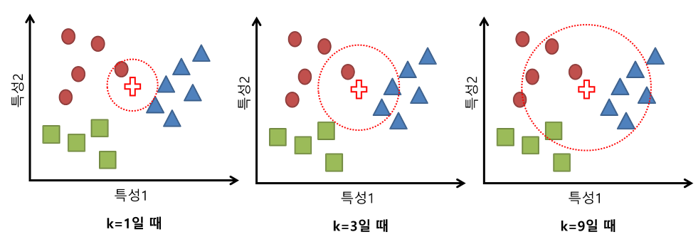

- 출처 : https://bskyvision.com/563?category=635506

In [ ]:
help(KNeighborsClassifier)

In [ ]:
for k in range(3, 10):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    ModelTrain(model_knn, data)
    print(f'k={k}, {model_knn.score(X, Y)}')

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9980492656058751
test  성능 : 0.9946450428396573
k=3, 0.9912569239474678
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.997093023255814
test  성능 : 0.9943390452876377
k=4, 0.9905745990734747
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.997360771113831
test  성능 : 0.9937270501835985
k=5, 0.9917014542352186
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.996672276621787
test  성능 : 0.9932680538555692
k=6, 0.9912666298489471
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9973990208078335
test  성능 : 0.9951040391676866
k=7, 0.9920576608195081
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9961750305997552
test  성능 : 0.9935740514075887
k=8, 0.9916189540726448
[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9965957772337821
test  성능 : 0.9941860465116279
k=9, 0.992152778654005


#### D) **DecisionTreeClassifier**
- overfitting 경향이 있음
- max_depth를 줄이는 방법으로 overfitting 해결
- (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

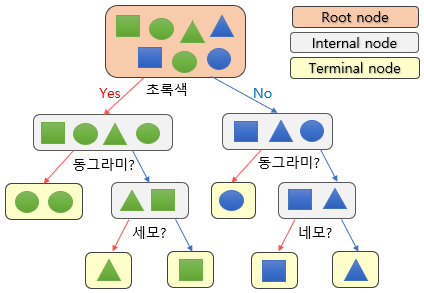

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
model_dc1 = DecisionTreeClassifier()
ModelTrain(model_dc1, data)
print(model_dc1.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 1.0
test  성능 : 0.9961750305997552
0.9936309874492988


In [ ]:
model_dc1.get_depth()

12

In [ ]:
model_dc2 = DecisionTreeClassifier(max_depth=6)
ModelTrain(model_dc2, data)
print(model_dc2.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9951805385556916
test  성능 : 0.9928090575275398
0.9888459780200155


In [ ]:
model_dc3 = DecisionTreeClassifier(max_depth=3)
ModelTrain(model_dc3, data)
print(model_dc3.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9645042839657283
test  성능 : 0.9600673194614443
0.9383908197701448


#### E) **RandomForestClassifier**
- DecisionTreeClassifier를 100개 사용하는 앙상블 모델
- n_estimators의 개수를 늘리거나, max_depth의 숫자를 조절하는 방법으로 성능 조절 가능
- (n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

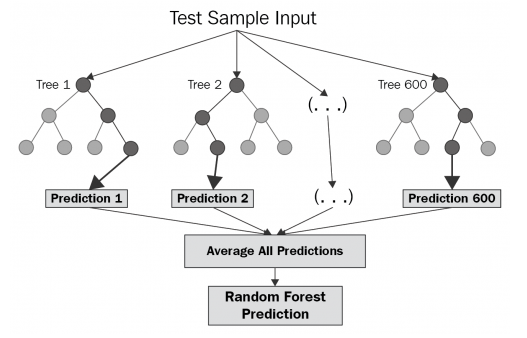
- 출처 : ```http://itwiki.kr/w/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8```

In [ ]:
help(RandomForestClassifier)

In [ ]:
model_rf1 = RandomForestClassifier()
ModelTrain(model_rf1, data)
print(model_rf1.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 1.0
test  성능 : 0.997093023255814
0.9960749334417806


In [ ]:
model_rf2 = RandomForestClassifier(n_estimators=500)
ModelTrain(model_rf2, data)
print(model_rf2.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 1.0
test  성능 : 0.9975520195838433
0.9961807277679047


#### F) **XGBClassifier**
- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
from xgboost import XGBClassifier
model_xgb1 = XGBClassifier()
ModelTrain(model_xgb1, data)
print(model_rf1.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9985847613219094
test  성능 : 0.9966340269277846
0.9960749334417806


In [ ]:
model_xgb2 = XGBClassifier(n_estimator=500, max_depth=5)
ModelTrain(model_xgb2, data)
print(model_xgb2.score(X, Y))

[(26144, 3), (6536, 3), (26144,), (6536,)]
train 성능 : 0.9999235006119951
test  성능 : 0.9972460220318238
0.9962603161600347


### 1-06. 성능평가


In [ ]:
# 앞서 성능이 좋았던 RandomForestClassifier를 사용하여 모델을 생성합니다.
data = make_sample(seedno=1234, size=50000)
model_rf = RandomForestClassifier(n_estimators=500)
ModelTrain(model_rf, data)

[(65348, 3), (16338, 3), (65348,), (16338,)]
train 성능 : 1.0
test  성능 : 0.9985310319500551


RandomForestClassifier(n_estimators=500)

In [ ]:
# 앞서 성능이 좋았던 XGBClassifier를 사용하여 모델을 생성합니다.
data = make_sample(seedno=1234, size=50000)
model_xgb = XGBClassifier(n_estimators=500)
ModelTrain(model_xgb, data)

[(65348, 3), (16338, 3), (65348,), (16338,)]
train 성능 : 0.9999387892513926
test  성능 : 0.9984698249479741


XGBClassifier(n_estimators=500)

오분류표
- sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
- y_ture: 실제값
- y_pred: 예측값


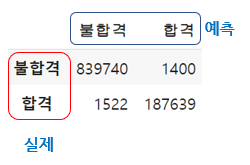

In [ ]:
# RandomForestClassifier의 각 종류별 정확도를 확인해 보도록 합니다.
from sklearn.metrics import confusion_matrix
label=['불합격', '합격']
print(model_rf.score(X, Y))
y_pred = model_rf.predict(X)
a = confusion_matrix(Y, y_pred)
b = pd.DataFrame(a, columns=label, index=label)
b

0.9971639355877554


,불합격,합격
불합격,839740,1400
합격,1522,187639


In [ ]:
# XGBClassifier의 각 종류별 정확도를 확인해 보도록 합니다.
from sklearn.metrics import confusion_matrix
label = ['불합격', '합격']
print(model_xgb.score(X, Y))
y_pred = model_xgb.predict(X)
a = confusion_matrix(Y, y_pred)
b = pd.DataFrame(a, columns=label, index=label)
b

0.997814230986867


,불합격,합격
불합격,839810,1330
합격,922,188239


In [ ]:
# 합격일 확률 구하기 (다른 데이터 사용)
data = make_sample(seedno=1234, size=6)
x_test = data[['국어', '영어', '수학']]
y_test = data['합격여부'] 
print(y_test.to_numpy()) # 실제값
print(model_xgb.predict(x_test))  # 예측값
proba = model_xgb.predict_proba(x_test)
print(proba)

[0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1]
[[9.9999839e-01 1.6184613e-06]
 [9.9999923e-01 8.0439816e-07]
 [1.0000000e+00 2.0854972e-13]
 [1.0000000e+00 5.3832224e-14]
 [1.0000000e+00 7.2971101e-11]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]]


In [ ]:
9.9999839e-01

0.99999839

### 1-07. 예측값 저장

In [ ]:
# test 데이터에서 '합격'일 확률에 대한 정보를 저장하여 출력합니다
submission = pd.DataFrame()
submission['id'] = pd.RangeIndex(1, len(X) + 1)
submission['prob'] = model_xgb.predict_proba(X)[:, 1]
submission.to_csv('submission.csv', index=False)

## 2.작업형 2 예시문제

### 2-01.문제이해

아래는 백화점 고객의 1년간 구매 데이터이다.

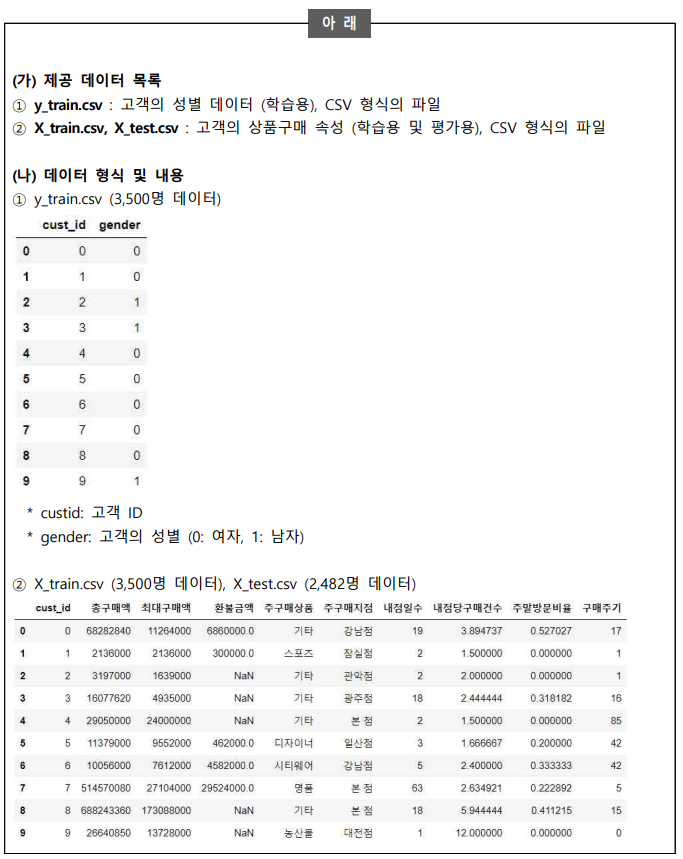

고객 3,500명에 대한 학습용 데이터(y_train.csv, X_train.csv)를 이용하여 성별예측 모형을 만든 후, 이를 평가용 데이터(X_test.csv)에 적용하여 얻은 2,482명 고객의 성별 예측값(남자일 확률)을 다음과 같은 형식의 csv 파일로 생성하시오. (제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

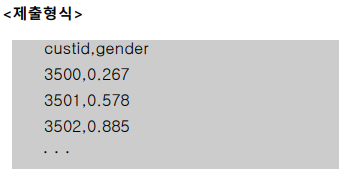

유의 사항

성능이 우수한 예측 모형을 구축하기 위해서는 적절한 데이터 전처리, Feature Engineering, 분류 알고리즘 사용, 초매개변수 최적화, 모형 앙상블 등이 수반되어야 한다.

### 2-02.데이터 불러오기, 탐색

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
# 시험환경에서는 아래와 같이 해야해서 수정했습니다 ^^*
pd.options.display.max_rows = 500     #출력할 max row를 지정
pd.options.display.max_columns = 20   #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# [1] 학습 데이터 X_train.csv 가져오기
X = pd.read_csv('bigdata/X_train.csv', encoding='cp949')
print(X.head(2))

   cust_id      총구매액     최대구매액         환불금액 주구매상품 주구매지점  내점일수  내점당구매건수  \
0        0  68282840  11264000 6860000.0000    기타   강남점    19   3.8947   
1        1   2136000   2136000  300000.0000   스포츠   잠실점     2   1.5000   

   주말방문비율  구매주기  
0  0.5270    17  
1  0.0000     1  


In [ ]:
# [2] 학습 데이터 y_train.csv 가져오기
Y = pd.read_csv('bigdata/y_train.csv')
print(Y.head(2))

   cust_id  gender
0        0       0
1        1       0


In [ ]:
# [3] 제출용 데이터 X_test.csv 가져오기
X_submission = pd.read_csv('bigdata/X_test.csv', encoding='cp949')
print(X_submission.head(2))

   cust_id       총구매액     최대구매액          환불금액 주구매상품 주구매지점  내점일수  내점당구매건수  \
0     3500   70900400  22000000  4050000.0000    골프  부산본점    13   1.4615   
1     3501  310533100  38558000 48034700.0000   농산물   잠실점    90   2.4333   

   주말방문비율  구매주기  
0  0.7895    26  
1  0.3699     3  


### 2-03.데이터전처리

In [ ]:
# 1. 결측치 없도록 한다
# 2. dtype : int, float 만 가능함!
#    object, datetime64, timedelta64 -> 적절하게 변경

In [ ]:
# [4] X, X_submission에 동일한 전처리를 위해 두 데이터 결합하여 
# dfX로 이름 붙이기
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
print(dfX.tail(2))

      cust_id      총구매액     최대구매액  환불금액 주구매상품 주구매지점  내점일수  내점당구매건수  주말방문비율  \
5980     5980  88991520  18120000   NaN    육류  본  점     5   3.6000  0.4444   
5981     5981    623700    209000   NaN  가공식품  영등포점     2   5.0000  0.0000   

      구매주기  
5980    60  
5981    31  


In [ ]:
# [5] 각 컬럼의 dtype 및 행, 열 개수 확인
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  5982 non-null   int64  
 1   총구매액     5982 non-null   int64  
 2   최대구매액    5982 non-null   int64  
 3   환불금액     2076 non-null   float64
 4   주구매상품    5982 non-null   object 
 5   주구매지점    5982 non-null   object 
 6   내점일수     5982 non-null   int64  
 7   내점당구매건수  5982 non-null   float64
 8   주말방문비율   5982 non-null   float64
 9   구매주기     5982 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 467.5+ KB


In [ ]:
# 이때! 문제지와 잘 비교해서 틀린 정보가 없는지 확인해야 합니다.

In [ ]:
# [6] dfX의 컬럼별 결측치 확인하기
print(dfX.isna().sum())

cust_id       0
총구매액          0
최대구매액         0
환불금액       3906
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64


In [ ]:
# 결측치 - 너무 많은 결측치를 가진 경우 
# 1. 해당 컬럼을 제거하고 사용
# 2. 다른 값으로 채우기 - 범주형 변수 (새로운 범주 생성), 연속형 변수 (평균, 중앙값)

In [ ]:
# 강의 내용에는 없음  아래처럼 실행할 경우 7 ~ 10번을 실행할 필요 없이 간단하게 처리하는 것임
# 환불금액이 nan 인 경우 0, nan이 아닌 경우 1로 변경
dfX['환불금액'] = dfX['환불금액'].notna().astype('int32')
print(dfX.corr())

         cust_id    총구매액   최대구매액    환불금액    내점일수  내점당구매건수  주말방문비율    구매주기
cust_id   1.0000  0.0206  0.0210  0.0032 -0.0017  -0.0055 -0.0179 -0.0029
총구매액      0.0206  1.0000  0.6826  0.4013  0.6484   0.1050  0.0160 -0.2126
최대구매액     0.0210  0.6826  1.0000  0.3227  0.3602   0.0291  0.0163 -0.1128
환불금액      0.0032  0.4013  0.3227  1.0000  0.5000   0.0674 -0.0066 -0.2090
내점일수     -0.0017  0.6484  0.3602  0.5000  1.0000   0.2303 -0.0036 -0.2953
내점당구매건수  -0.0055  0.1050  0.0291  0.0674  0.2303   1.0000  0.0110 -0.0781
주말방문비율   -0.0179  0.0160  0.0163 -0.0066 -0.0036   0.0110  1.0000 -0.0135
구매주기     -0.0029 -0.2126 -0.1128 -0.2090 -0.2953  -0.0781 -0.0135  1.0000


In [ ]:
# [7] 결측치를 채우기 위한 값 선정을 위한 작업
# 주구매상품별로 환불금액 평균이 다름을 확인
temp = dfX.groupby('주구매상품')['환불금액'].mean()
print(temp)

In [ ]:
dfX['주구매상품'].head(5)

0        기타
1       스포츠
2    남성 캐주얼
3        기타
4        보석
Name: 주구매상품, dtype: object

In [ ]:
# [8] '주구매상품'별 '환불금액' 평균으로 '환불금액'의 결측치를 채우기 한다
# 채우기 한 뒤 '환불금액'으로 추가한다. 
temp = dfX.groupby('주구매상품')['환불금액'].transform('mean')
dfX['환불금액'] = dfX['환불금액'].mask(dfX['환불금액'].isna(), temp)  # dfX['환불금액']의 결측치를 temp로 채우기

In [ ]:
# [9] '환불금액' 컬럼의 결측치 행을 확인해 본다
dfX[dfX['환불금액'].isna()]   # 주구매상품 중에서 '통신/컴퓨터', '소형가전', '악기' 채워지지 않음

In [ ]:
# [10] '주구매상품'별 평균을 구할 수 없는 경우 '환불금액'을 '환불금액'의 평균으로 채우기 합니다.
# 채우기 후에 채우기가 잘 적용되었는지 확인합니다.
dfX['환불금액'] = dfX['환불금액'].fillna(dfX['환불금액'].mean())
print(dfX.isna().sum().sum())

0


In [ ]:
# [11] dfX에서 높은 상관계수 확인하기 (X Feature간)
# 상관관계가 높은 X1, X2가 있다면 제거 : -1 또는 1에 가까운 것은 좋지 않음
print(dfX.corr())

         cust_id    총구매액   최대구매액    환불금액    내점일수  내점당구매건수  주말방문비율    구매주기
cust_id   1.0000  0.0206  0.0210  0.0113 -0.0017  -0.0055 -0.0179 -0.0029
총구매액      0.0206  1.0000  0.6826  0.3773  0.6484   0.1050  0.0160 -0.2126
최대구매액     0.0210  0.6826  1.0000  0.3726  0.3602   0.0291  0.0163 -0.1128
환불금액      0.0113  0.3773  0.3726  1.0000  0.2362  -0.0270 -0.0174 -0.0754
내점일수     -0.0017  0.6484  0.3602  0.2362  1.0000   0.2303 -0.0036 -0.2953
내점당구매건수  -0.0055  0.1050  0.0291 -0.0270  0.2303   1.0000  0.0110 -0.0781
주말방문비율   -0.0179  0.0160  0.0163 -0.0174 -0.0036   0.0110  1.0000 -0.0135
구매주기     -0.0029 -0.2126 -0.1128 -0.0754 -0.2953  -0.0781 -0.0135  1.0000


In [ ]:
# [12] Y['gender'] 값의 분포 확인 - 여성 (62.4%), 남성 (37.6%)
temp = Y['gender'].value_counts(normalize=True)
print(temp)

0   0.6240
1   0.3760
Name: gender, dtype: float64


In [ ]:
dfX.iloc[:3500,:].columns, Y.columns

(Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
        '주말방문비율', '구매주기'],
       dtype='object'), Index(['cust_id', 'gender'], dtype='object'))

In [ ]:
# [13] dfX.iloc[:3500,:], Y를 병합(merge)하여 dfXY를 만들어 사용
dfXY = pd.merge(dfX.iloc[:3500,:], Y)
dfXY.columns, dfXY.shape

(Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
        '주말방문비율', '구매주기', 'gender'],
       dtype='object'), (3500, 11))

In [ ]:
# [강의 내용에는 없음]  범주별 평균의 차이가 있는지 검증
from scipy import stats

def statistical_test(mode, df, cat, target):
    uniques= df[cat].unique()
    
    if mode == 't':
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.ttest_ind(*samples)
        return value, p, 'Statistically Signifcant' if p<=0.05 else 'Statistically Insignifcant'
    elif mode == 'f':
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.f_oneway(*samples)
        return value, p, 'Statistically Signifcant' if p<=0.05 else 'Statistically Insignifcant'

# 환불금액을   환불여부를 나타내는 0, 1로 채웠을 때 gender별 평균이 유의미하게 다음  
statistical_test('f', dfXY, '환불금액', 'gender')      

(149.5047891988149, 1.0736788722190066e-33, 'Statistically Signifcant')

In [ ]:
#temp = pd.concat([dfX.iloc[:3500,:], Y['gender']], axis=1)
#temp.columns, temp.shape

(Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
        '주말방문비율', '구매주기', 'gender'],
       dtype='object'), (3500, 11))

In [ ]:
# [14] dfXY를 사용해 성별별 평균을 구한다.
# 'gender'에 따라 총구매액 ~ 구매주기에 값의 차이가 있는지 확인한다.
temp = dfXY.groupby('gender').mean()
print(temp)

         cust_id           총구매액         최대구매액          환불금액    내점일수  내점당구매건수  \
gender                                                                         
0      1751.0636 110972689.2674 22502944.8672 23035538.5256 22.5229   2.9001   
1      1746.9050  60298653.4422 14953202.6140 18234312.8038 13.8283   2.7268   

        주말방문비율    구매주기  
gender                  
0       0.2907 20.1621  
1       0.3347 22.2796  


In [ ]:
# [15] dfXY를 사용해 '주구매지점'별, 'gender'별 방문횟수를 확인한다
# 성별에 다른 분포가 있으므로 '주구매지점' 포함
temp = dfXY.groupby(['주구매지점', 'gender'])['주구매지점'].count()
print(temp)

In [ ]:
# [16] dfXY를 사용해 '주구매상품'별, 'gender'별 방문횟수를 확인한다
# 성별에 다른 분포가 있으므로 '주구매상품' 포함
temp = dfXY.groupby(['주구매상품', 'gender'])['주구매상품'].count()
print(temp)

In [ ]:
# object dtype 이었던 '주구매지점' '주구매상품' => 숫자로 변경

In [ ]:
# [17] dfX에서 '주구매지점'에 대해 중복을 제거해 본다 (고윳값을 확인함)
A = dfX['주구매지점'].unique()
print(A)   # 명목형

['강남점' '잠실점' '관악점' '광주점' '본  점' '일산점' '대전점' '부산본점' '분당점' '영등포점' '미아점'
 '청량리점' '안양점' '부평점' '동래점' '포항점' '노원점' '창원점' '센텀시티점' '인천점' '대구점' '전주점'
 '울산점' '상인점']


In [ ]:
# [18] dfX에서 '주구매상품'에 대해 중복을 제거해 본다 (고윳값을 확인함)
B = dfX['주구매상품'].unique()
print(B)   # 명목형

['기타' '스포츠' '남성 캐주얼' '보석' '디자이너' '시티웨어' '명품' '농산물' '화장품' '골프' '구두' '가공식품'
 '수산품' '아동' '차/커피' '캐주얼' '섬유잡화' '육류' '축산가공' '젓갈/반찬' '액세서리' '피혁잡화' '일용잡화'
 '주방가전' '주방용품' '건강식품' '가구' '주류' '모피/피혁' '남성 트랜디' '셔츠' '남성정장' '생활잡화'
 '트래디셔널' '란제리/내의' '커리어' '침구/수예' '대형가전' '통신/컴퓨터' '식기' '소형가전' '악기']


In [ ]:
# [19] '주구매지점', '주구매상품'에 대해 Label Encoding을 실행한다
# 항목별 순서 개념이 없는 경우
dfX['주구매지점'] = dfX['주구매지점'].astype('category').cat.codes
dfX['주구매상품'] = dfX['주구매상품'].astype('category').cat.codes

In [ ]:
# [20] 최종 데이터 점검
# 결측치 확인, 데이터타입 확인(수치형)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  5982 non-null   int64  
 1   총구매액     5982 non-null   int64  
 2   최대구매액    5982 non-null   int64  
 3   환불금액     5982 non-null   float64
 4   주구매상품    5982 non-null   int8   
 5   주구매지점    5982 non-null   int8   
 6   내점일수     5982 non-null   int64  
 7   내점당구매건수  5982 non-null   float64
 8   주말방문비율   5982 non-null   float64
 9   구매주기     5982 non-null   int64  
dtypes: float64(3), int64(5), int8(2)
memory usage: 385.7 KB


### 2-04.데이터 분리, 모델 생성 및 학습

In [ ]:
# [21] 사용할 도구 import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# [22] train score, test score, roc_auc_score 를 반환하는 함수 작성
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

In [ ]:
# [23] 다양한 모델을 만들고 성능을 출력하는 함수 작성
def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting ??
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest)) 

    # overfitting ??
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier().fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

In [ ]:
# [24] X를 train 용도, submission 용도로 나누고, Y를 1차원으로 바꿈 
# (StandardScaler 적용)
def get_data(dfX, Y):
    X = dfX.drop(columns=['cust_id'])
    X_use = X.iloc[:3500, :]
    X_submission = X.iloc[3500:, :]
    Y1 = Y['gender']
    scaler = StandardScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, X1_submission.shape, Y1.shape)
    return X1_use, X1_submission, Y1

In [ ]:
# [25] dfX, Y 사용 

# X, Y 분리하기
X1_use, X1_submission, Y1 = get_data(dfX, Y)
# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain, xtest, ytrain, ytest = train_test_split(X1_use, Y1,
                                                test_size=0.3,
                                                stratify=Y1,
                                                random_state=0)
# 다양한 모델 만들어 보기
# make_models 함수 호출 부분은 
# 실제 시험에서 제출 전에 꼭 주석을 취해 주세요 ^_^  - 실행 시간 초과 금지

make_models(xtrain, xtest, ytrain, ytest)

In [ ]:
0.6959 - 0.6686, 0.7314 - 0.6590, 0.7669 - 0.6648

(0.02729999999999999, 0.07240000000000002, 0.10210000000000008)

In [ ]:
# [26] roc_auc 가장 성능이 좋은 모델 선택  
# model4 6 0.7314 0.6590 0.6989
model = RandomForestClassifier(500, max_depth=6,random_state=0).fit(xtrain, ytrain)
print('final model', get_scores(model, xtrain, xtest, ytrain, ytest))

final model 0.7314 0.6590 0.6989


In [ ]:
# 29강에서 설명합니다.
# depth = 5 도 좋음 : train, test 점수 차이가 많지 않고, roc_auc 점수 좋음
# train, test, roc_auc를 모두 고려해서 앞으로 평가에 좋은 결과를 보일 것으로 예상됨
model = RandomForestClassifier(500, max_depth=5,random_state=0).fit(xtrain, ytrain)
print('final model', get_scores(model, xtrain, xtest, ytrain, ytest))

In [ ]:
# 또는 GridSearchCV를 사용해 좋은 parameter를 찾아볼 수 있음

### 2-05.제출할 데이터 생성

In [ ]:
X_submission.columns

Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
       '주말방문비율', '구매주기'],
      dtype='object')

In [ ]:
# [27] X1_submission 으로 cust_id와 예측한 남자일 확률을 파일로 저장하기
pred = model.predict_proba(X1_submission)[:, 1]
submission = pd.DataFrame({'cust_id': X_submission['cust_id'],
                           'gender': pred})
submission.to_csv('submission.csv', index=False)

In [ ]:
# [28] 파일 읽어 출력해 보기
temp = pd.read_csv('submission.csv')
temp.head(2)

,cust_id,gender
0,3500,0.4919
1,3501,0.1835


환불금액을 제거하는 방법으로 해결한 코드

In [ ]:
# 데이터 파일 읽기 예제
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

pd.set_option('max_rows',500)    #출력할 max row를 지정
pd.set_option('max_columns',20)  #출력할 max columns를 지정

def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting ??
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest)) 

    # overfitting ??
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))
		
def get_data(dfX, Y):
    X = dfX.drop(columns=['cust_id'])
    X_use = X.iloc[:3500, :]
    X_submission = X.iloc[3500:, :]
    Y1 = Y['gender']
    scaler = StandardScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, X1_submission.shape, Y1.shape)
    return X1_use, X1_submission, Y1
	
	
X_submission = pd.read_csv("bigdata/X_test.csv", encoding='cp949')
X = pd.read_csv("bigdata/X_train.csv", encoding='cp949')
Y = pd.read_csv("bigdata/y_train.csv")

dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)

# 결측치가 많은 환불금액을 제거해 봄  =>  수정내용
dfX = dfX.drop(columns='환불금액')

A = dfX['주구매지점'].unique()
B = dfX['주구매상품'].unique()
dfX['주구매지점'] = dfX['주구매지점'].astype('category').cat.codes
dfX['주구매상품'] = dfX['주구매상품'].astype('category').cat.codes

# X, Y 분리하기
X1_use, X1_submission, Y1 = get_data(dfX, Y)
# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain, xtest, ytrain, ytest = train_test_split(X1_use, Y1,
                                                test_size=0.3,
                                                stratify=Y1,
                                                random_state=0)
# 다양한 모델 만들어 보기
make_models(xtrain, xtest, ytrain, ytest)

model = RandomForestClassifier(500, max_depth=6,random_state=0).fit(xtrain, ytrain)
print('final model', get_scores(model, xtrain, xtest, ytrain, ytest))
pred = model.predict_proba(X1_submission)[:, 1]
submission = pd.DataFrame({'cust_id': X_submission['cust_id'],
                           'gender': pred})
submission.to_csv('003000000.csv', index=False)

(3500, 8) (2482, 8) (3500,)
model1 0.6331 0.6390 0.6574
model2 1 1.0000 0.5733 0.5445
model2 2 0.7927 0.6029 0.5560
model2 3 0.8012 0.5933 0.5719
model2 4 0.7429 0.6162 0.5774
model2 5 0.7416 0.6143 0.6049
model2 6 0.7180 0.6381 0.6058
model2 7 0.7216 0.6143 0.6055
model2 8 0.7029 0.6305 0.6083
model2 9 0.6984 0.6276 0.6099
model3 1.0000 0.5676 0.5449
model3 3 0.6473 0.6581 0.6695
model3 4 0.6616 0.6429 0.6626
model3 5 0.6788 0.6476 0.6539
model3 6 0.6967 0.6381 0.6540
model3 7 0.7073 0.6390 0.6597
model4 1.0000 0.6343 0.6498
model4 3 0.6604 0.6448 0.6854
model4 4 0.6747 0.6505 0.6907
model4 5 0.6935 0.6533 0.6915
model4 6 0.7229 0.6476 0.6923
model4 7 0.7616 0.6533 0.6915
model5 0.7224 0.6695 0.6910
final model 0.7229 0.6476 0.6923


In [ ]:
##  체험하기에 제출했던 내용
# 출력을 원하실 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

# 데이터 파일 읽기 예제
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# 시험환경에서는 아래와 같이 해야해서 수정했습니다 ^^*
pd.options.display.max_rows = 500     #출력할 max row를 지정
pd.options.display.max_columns = 20   #출력할 max columns를 지정

def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression(max_iter=5000).fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))

    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting ??
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest)) 

    # overfitting ??
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))
		
def get_data(dfX, Y):
    X = dfX.drop(columns=['cust_id'])
    X_use = X.iloc[:3500, :]
    X_submission = X.iloc[3500:, :]
    Y1 = Y['gender']
    scaler = StandardScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, X1_submission.shape, Y1.shape)
    return X1_use, X1_submission, Y1
	
# 이 부분은 colab 경로와 다르므로 실행되지 않습니다.	
X_submission = pd.read_csv("data/X_test.csv")
X = pd.read_csv("data/X_train.csv")
Y = pd.read_csv("data/y_train.csv")

# 사용자 코딩
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
#print(dfX.isna().sum())
temp = dfX.groupby('주구매상품')['환불금액'].mean()
#print(temp)
temp = dfX.groupby('주구매상품')['환불금액'].transform('mean')
# dfX['환불금액']의 결측치를 temp로 채우기
dfX['환불금액'] = dfX['환불금액'].mask(dfX['환불금액'].isna(), temp) 
dfX['환불금액'] = dfX['환불금액'].fillna(dfX['환불금액'].mean())
#print(dfX.isna().sum().sum())
#print(dfX.corr())
A = dfX['주구매지점'].unique()
B = dfX['주구매상품'].unique()
dfX['주구매지점'] = dfX['주구매지점'].astype('category').cat.codes
dfX['주구매상품'] = dfX['주구매상품'].astype('category').cat.codes
#dfX.info()

# X, Y 분리하기
X1_use, X1_submission, Y1 = get_data(dfX, Y)
# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain, xtest, ytrain, ytest = train_test_split(X1_use, Y1,
                                                test_size=0.3,
                                                stratify=Y1,
                                                random_state=0)
# 다양한 모델 만들어 보기
#make_models(xtrain, xtest, ytrain, ytest)

model = RandomForestClassifier(500, max_depth=6,random_state=0).fit(xtrain, ytrain)
print('final model', get_scores(model, xtrain, xtest, ytrain, ytest))
pred = model.predict_proba(X1_submission)[:, 1]
submission = pd.DataFrame({'cust_id': X_submission['cust_id'],
                           'gender': pred})
submission.to_csv('003000000.csv', index=False)
#print(submission.head(5))
# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)


## 3.기출문제 (빅분기 실기 2회)
고객 구매 데이터를 사용해서 고객이 주문한 물품이 제 시간에 도착여부(Reached.on.Time_Y.N) 예측

### 3-01.문제이해

In [ ]:
# https://www.kaggle.com/prachi13/customer-analytics

In [ ]:
# 기출에서 기억나는 것
# - 컬럼 중 1개가 숫자형으로 안내 되었는데 info() 결과 object로 표시됨
# - head() 로 해서 표시되지 않았음 
# - value가 '1', '*7', '4', '9', '*7' 이렇게 되어 있어서 '*'을 제거하고 dtype을 변경해야함

In [ ]:
import pandas as pd
# 이상한 것 확인
df = pd.DataFrame({'rating': ['1', '2', '4', '*7', '8', '*7', '3', '5', '2', '*4']})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  10 non-null     object
dtypes: object(1)
memory usage: 208.0+ bytes


In [ ]:
# 해결 방법
df['rating'] = df['rating'].replace('\*', '', regex=True).astype('int')
#df['rating'].str.replace('\*', '', regex=True).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


### 3-02.데이터 불러오기, 탐색

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 50, done.
remote: Total 50 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (50/50), done.


In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
pd.set_option('display.max_rows',500)    #출력할 max row를 지정
pd.set_option('display.max_columns',20)  #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# [0] x_train, x_test 데이터로 생성함
from sklearn.model_selection import train_test_split

dftot = pd.read_csv('./bigdata/1st_Train.csv')
x_train, x_test = train_test_split(dftot, test_size=0.4, stratify=dftot['Reached.on.Time_Y.N'], random_state=0)
y_train = x_train[['ID','Reached.on.Time_Y.N']]
x_train = x_train.drop(columns='Reached.on.Time_Y.N')
y_test = x_test[['ID','Reached.on.Time_Y.N']]   # 이것은 시험에서는 제공되지 않음
x_test = x_test.drop(columns='Reached.on.Time_Y.N')

x_train.to_csv('x_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False) # 이것은 시험에서는 제공되지 않음

In [ ]:
x_train.shape, y_train.shape, x_test.shape

((6599, 11), (6599, 2), (4400, 11))

In [ ]:
# [1] x_train.csv, y_train.csv, x_test.csv 읽어오기
X = pd.read_csv('x_train.csv')
Y = pd.read_csv('y_train.csv')
X_submission = pd.read_csv('x_test.csv')
print(X.shape, Y.shape, X_submission.shape)

(6599, 11) (6599, 2) (4400, 11)


In [ ]:
# [2] X, X_submission 합치기 => dfX로 저장 (필수는 아님- 편리성을 위해!)
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
print(dfX.shape)

(10999, 11)


In [ ]:
dfX.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9902,F,Ship,3,5,214,2,medium,F,6,4578
1,9501,A,Ship,4,2,201,3,medium,F,4,4613
2,6111,A,Ship,4,2,264,3,low,M,10,5137
3,588,F,Ship,3,5,194,2,medium,M,4,3496
4,10806,F,Road,5,5,269,5,medium,F,3,1120


In [ ]:
# [3] dfX의 정보 확인 
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [ ]:
# Warehouse_block, Mode_of_Shipment, Product_importance, Gender => Object
# Encoding 대상

### 3-03.데이터 전처리

In [ ]:
# [4] 결측치 점검
print(dfX.isna().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64


In [ ]:
# [5] 상관관계 확인 - 모든 feature를 사용해도 됨
print(dfX.corr())

                         ID  Customer_care_calls  Customer_rating  \
ID                   1.0000               0.1890          -0.0057   
Customer_care_calls  0.1890               1.0000           0.0122   
Customer_rating     -0.0057               0.0122           1.0000   
Cost_of_the_Product  0.1968               0.3232           0.0093   
Prior_purchases      0.1454               0.1808           0.0132   
Discount_offered    -0.5983              -0.1308          -0.0031   
Weight_in_gms        0.2783              -0.2766          -0.0019   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                                0.1968           0.1454           -0.5983   
Customer_care_calls               0.3232           0.1808           -0.1308   
Customer_rating                   0.0093           0.0132           -0.0031   
Cost_of_the_Product               1.0000           0.1237           -0.1383   
Prior_purchases                   0.1237           1

In [ ]:
X.columns, Y.columns

(Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
        'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
       dtype='object'), Index(['ID', 'Reached.on.Time_Y.N'], dtype='object'))

In [ ]:
# [6] Y 값의 분포 확인
temp = Y['Reached.on.Time_Y.N'].value_counts(normalize=True).sort_index()
print(temp)   # 0 : 40.32%,   1 : 59.68%

0   0.4032
1   0.5968
Name: Reached.on.Time_Y.N, dtype: float64


In [ ]:
# [7] X,Y를 합쳐 dfXY를 만듦 (양쪽에 ID가 있으므로 merge)
dfXY = pd.merge(dfX.iloc[:6599, :], Y)
#dfXY = pd.merge(X, Y)
print(dfXY.shape)

(6599, 12)


In [ ]:
# [8] 범주별 'Reached.on.Time_Y.N'의 개수, 비율을 표시하는 DataFrame 작성 함수
def make_table(df, feature):
    result = pd.DataFrame()
    temp = df.groupby([feature, 'Reached.on.Time_Y.N'])[feature].count()
    result['Count'] = temp

    sList = []
    for k in sorted(df[feature].unique()):
        temp = df.loc[df[feature]==k, 'Reached.on.Time_Y.N'].value_counts(normalize=True)
        temp = temp.sort_index()
        sList.append(temp)
    result = result.reset_index()
    result['Rate'] = pd.concat(sList, ignore_index=True)
    return result

In [ ]:
# [9] 'Warehouse_block', 'Reached.on.Time_Y.N'별 'Warehouse_block'의 개수, 비율
temp = make_table(dfXY, 'Warehouse_block')
print(temp)

  Warehouse_block  Reached.on.Time_Y.N  Count   Rate
0               A                    0    430 0.3895
1               A                    1    674 0.6105
2               B                    0    454 0.4116
3               B                    1    649 0.5884
4               C                    0    442 0.4077
5               C                    1    642 0.5923
6               D                    0    436 0.4071
7               D                    1    635 0.5929
8               F                    0    899 0.4019
9               F                    1   1338 0.5981


In [ ]:
# [10] 'Mode_of_Shipment', 'Reached.on.Time_Y.N'별 'Mode_of_Shipment'의 개수, 비율
temp = make_table(dfXY, 'Mode_of_Shipment')
print(temp)

  Mode_of_Shipment  Reached.on.Time_Y.N  Count   Rate
0           Flight                    0    433 0.3987
1           Flight                    1    653 0.6013
2             Road                    0    427 0.4142
3             Road                    1    604 0.5858
4             Ship                    0   1801 0.4018
5             Ship                    1   2681 0.5982


In [ ]:
# [11] 'Product_importance', 'Reached.on.Time_Y.N'별 'Product_importance'의 개수, 비율
temp = make_table(dfXY, 'Product_importance')
print(temp)

  Product_importance  Reached.on.Time_Y.N  Count   Rate
0               high                    0    211 0.3670
1               high                    1    364 0.6330
2                low                    0   1288 0.4063
3                low                    1   1882 0.5937
4             medium                    0   1162 0.4071
5             medium                    1   1692 0.5929


In [ ]:
# [12] 'Gender', 'Reached.on.Time_Y.N'별 'Gender'의 개수, 비율
temp = make_table(dfXY, 'Gender')
print(temp)

  Gender  Reached.on.Time_Y.N  Count   Rate
0      F                    0   1341 0.4069
1      F                    1   1955 0.5931
2      M                    0   1320 0.3996
3      M                    1   1983 0.6004


In [ ]:
# [13] dfX의 각 컬럼의 값 종류 개수 - 1인 것 제거하기 위해
dfX.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
dtype: int64

In [ ]:
# [14] Object 타입에 대한 Label Encoding => df_LE
df_LE = dfX.copy()
df_LE['Gender'] = dfX['Gender'].replace(['F', 'M'], [0, 1])
df_LE['Warehouse_block'] = dfX['Warehouse_block'].replace(['A', 'B', 'C', 'D', 'F'], [0, 1, 2, 3, 4])
df_LE['Mode_of_Shipment'] = dfX['Mode_of_Shipment'].replace(['Ship', 'Road', 'Flight'], [0, 1, 2])
df_LE['Product_importance'] = dfX['Product_importance'].replace(['low', 'medium', 'high'], [0, 1, 2])
df_LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


In [ ]:
# [15] Object 타입에 대한 One Hot Encoding => df_OH
features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
df_OH = dfX.copy()
df_OH['Gender'] = dfX['Gender'].replace(['F', 'M'], [0, 1])
df_OH = df_OH.drop(columns=features)

tempList = [df_OH]
for f in features:
    s = pd.get_dummies(dfX[f])
    # s = dfX[f].str.get_dummies() 와 동일함  
    tempList.append(s)
df_OH = pd.concat(tempList, axis=1)  
print(df_OH.shape)
print(df_OH.columns)

(10999, 19)
Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Gender', 'Discount_offered', 'Weight_in_gms', 'A',
       'B', 'C', 'D', 'F', 'Flight', 'Road', 'Ship', 'high', 'low', 'medium'],
      dtype='object')


In [ ]:
# [16] df_OH 에서 영향력이 있다고 생각되는 것만 골라서 사용
features = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'A',
       'B', 'Flight', 'Road', 'high']
df_MINI = df_OH[features]  

### 3-04.데이터 분리, 모델 생성 및 학습

In [ ]:
# [17] 사용할 도구 import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

아래의 함수는 예시문제에서 만든 것과 동일하며, 약간의 수정이 있음

In [ ]:
# [18] train score, test score, roc_auc_score 를 반환하는 함수 작성
def get_scores(model, xtrain, xtest, ytrain, ytest):
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)[:, 1]
    C = roc_auc_score(ytest, ypred)  
    return '{:.4f} {:.4f} {:.4f}'.format(A, B, C)

In [ ]:
# [19] 다양한 모델을 만들고 성능을 출력하는 함수 작성
def make_models(xtrain, xtest, ytrain, ytest):
    model1 = LogisticRegression().fit(xtrain, ytrain)
    print('model1', get_scores(model1, xtrain, xtest, ytrain, ytest))
    for k in range(1, 10):
        model2 = KNeighborsClassifier(k).fit(xtrain, ytrain)
        print('model2', k, get_scores(model2, xtrain, xtest, ytrain, ytest))

    # overfitting
    model3 = DecisionTreeClassifier(random_state=0).fit(xtrain, ytrain)
    print('model3', get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model3 = DecisionTreeClassifier(max_depth=d,random_state=0).fit(xtrain, ytrain)
        print('model3', d, get_scores(model3, xtrain, xtest, ytrain, ytest))

    # overfitting
    model4 = RandomForestClassifier(random_state=0).fit(xtrain, ytrain)
    print('model4', get_scores(model4, xtrain, xtest, ytrain, ytest))

    # overfitting 해결
    for d in range(3, 8):
        model4 = RandomForestClassifier(500, max_depth=d, random_state=0).fit(xtrain, ytrain)
        print('model4', d, get_scores(model4, xtrain, xtest, ytrain, ytest))

    model5 = XGBClassifier(eval_metric='logloss', use_label_encoder=False).fit(xtrain, ytrain)
    print('model5', get_scores(model5, xtrain, xtest, ytrain, ytest))

In [ ]:
# [20] X를 train 용도, submission 용도로 나누고, Y를 1차원으로 바꿈 (MinMaxScaler 적용)
def get_data(dfX, Y):
    X = dfX.drop(columns=['ID'])
    X_use = X.iloc[:6599, :]
    X_submission = X.iloc[6599:, :]
    Y1 = Y['Reached.on.Time_Y.N']
    scaler = MinMaxScaler()
    X1_use = scaler.fit_transform(X_use)
    X1_submission = scaler.transform(X_submission)
    print(X1_use.shape, Y1.shape, X1_submission.shape)
    return X1_use, X1_submission, Y1

In [ ]:
# [21] df_LE 사용 

# X, Y 분리하기
X1_use, X1_submission, Y1 = get_data(df_LE, Y)
# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1_use, Y1,
                                                test_size=0.3,
                                                stratify=Y1,
                                                random_state=0)
# 다양한 모델 만들어 보기
make_models(xtrain1, xtest1, ytrain1, ytest1)

(6599, 10) (6599,) (4400, 10)
model1 0.6508 0.6419 0.7225
model2 1 1.0000 0.6288 0.6109
model2 2 0.8088 0.6379 0.6674
model2 3 0.8097 0.6434 0.6922
model2 4 0.7647 0.6389 0.6993
model2 5 0.7707 0.6439 0.7042
model2 6 0.7465 0.6495 0.7124
model2 7 0.7463 0.6485 0.7183
model2 8 0.7341 0.6515 0.7185
model2 9 0.7296 0.6414 0.7149
model3 1.0000 0.6364 0.6199
model3 3 0.6776 0.6763 0.7429
model3 4 0.6820 0.6783 0.7437
model3 5 0.6893 0.6874 0.7487
model3 6 0.6939 0.6747 0.7404
model3 7 0.7077 0.6717 0.7359
model4 1.0000 0.6551 0.7285
model4 3 0.6779 0.6732 0.7464
model4 4 0.6954 0.6758 0.7438
model4 5 0.7058 0.6773 0.7437
model4 6 0.7212 0.6773 0.7432
model4 7 0.7456 0.6773 0.7414
model5 0.7216 0.6727 0.7349


In [ ]:
# [22] df_OH 사용 데이터 섞기, X, Y 분리하기

# X, Y 분리하기
X2_use, X2_submission, Y2 = get_data(df_OH, Y)
# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2_use, Y2,
                                                test_size=0.3,
                                                stratify=Y2,
                                                random_state=0)
# 다양한 모델 만들어 보기
make_models(xtrain2, xtest2, ytrain2, ytest2)

(6599, 18) (6599,) (4400, 18)
model1 0.6491 0.6364 0.7215
model2 1 1.0000 0.6136 0.5972
model2 2 0.8060 0.6076 0.6415
model2 3 0.8160 0.6126 0.6559
model2 4 0.7627 0.6010 0.6631
model2 5 0.7707 0.6192 0.6711
model2 6 0.7413 0.6121 0.6713
model2 7 0.7380 0.6141 0.6735
model2 8 0.7216 0.6141 0.6728
model2 9 0.7246 0.6253 0.6783
model3 1.0000 0.6409 0.6227
model3 3 0.6776 0.6763 0.7429
model3 4 0.6820 0.6783 0.7437
model3 5 0.6893 0.6874 0.7487
model3 6 0.6939 0.6747 0.7404
model3 7 0.7077 0.6707 0.7341
model4 1.0000 0.6566 0.7309
model4 3 0.6781 0.6727 0.7448
model4 4 0.6885 0.6717 0.7432
model4 5 0.7097 0.6732 0.7413
model4 6 0.7287 0.6773 0.7395
model4 7 0.7616 0.6742 0.7379
model5 0.7129 0.6682 0.7378


In [ ]:
# [23] df_MINI 사용 데이터 섞기, X, Y 분리하기

# X, Y 분리하기
X3_use, X3_submission, Y3 = get_data(df_MINI, Y)
# train, test  7:3 분할, stratify 적용, random_state=0 적용
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(X3_use, Y3,
                                                test_size=0.3,
                                                stratify=Y3,
                                                random_state=0)
# 다양한 모델 만들어 보기
# make_models 함수 호출 부분은 
# 실제 시험에서 제출 전에 꼭 주석을 취해 주세요 ^_^  - 실행 시간 초과 금지

make_models(xtrain3, xtest3, ytrain3, ytest3)

(6599, 11) (6599,) (4400, 11)
model1 0.6501 0.6389 0.7221
model2 1 1.0000 0.6222 0.6101
model2 2 0.8065 0.6338 0.6654
model2 3 0.8151 0.6359 0.6973
model2 4 0.7668 0.6460 0.7038
model2 5 0.7753 0.6308 0.7074
model2 6 0.7493 0.6399 0.7110
model2 7 0.7502 0.6439 0.7166
model2 8 0.7393 0.6470 0.7176
model2 9 0.7335 0.6419 0.7185
model3 1.0000 0.6480 0.6331
model3 3 0.6776 0.6763 0.7429
model3 4 0.6820 0.6783 0.7437
model3 5 0.6893 0.6874 0.7487
model3 6 0.6939 0.6747 0.7404
model3 7 0.7077 0.6702 0.7332
model4 1.0000 0.6535 0.7275
model4 3 0.6785 0.6727 0.7465
model4 4 0.6967 0.6818 0.7460
model4 5 0.7066 0.6813 0.7434
model4 6 0.7192 0.6798 0.7412
model4 7 0.7467 0.6763 0.7424
model5 0.7235 0.6773 0.7375


In [ ]:
# [24] 최종적으로 사용할 모델을 선택하여 model로 다시 생성합니다.
model = DecisionTreeClassifier(max_depth=5,random_state=0).fit(xtrain1, ytrain1)
print('final model', get_scores(model, xtrain1, xtest1, ytrain1, ytest1))

final model 0.6893 0.6874 0.7487


### 3-05.제출할 데이터 생성

In [ ]:
# [25] test 데이터(X_submission, X1_submission)에 대한 확률 구하기, 파일로 저장하기
pred = model.predict_proba(X1_submission)[:, 1]
submission = pd.DataFrame({'ID': X_submission['ID'],
                           'Reached.on.Time_Y.N': pred})
submission.to_csv('submission.csv', index=False)

In [ ]:
# [26] submission 확인
submission.head(5)

,ID,Reached.on.Time_Y.N
0,7007,0.4627
1,9793,0.4627
2,6593,0.4656
3,10527,0.3921
4,6914,0.4656


In [ ]:
# [27] 비슷할까요?! - 시험에서는 주지 않는 데이터
ytest = pd.read_csv('y_test.csv')
roc_auc_score(ytest['Reached.on.Time_Y.N'], pred) 

0.7470310932260228

## 4.이항 분류 모델의 성능평가
- sklearn.metrics.accuracy_score(y_true, y_pred) = (TP/TN) / (TP+TN+FP+FN)
- sklearn.metrics.precision_score(y_true, y_pred) = TP / (TP + FP)
- sklearn.metrics.recall_score(y_true, y_pred) = TP / (TP + FN)
- sklearn.metrics.f1_score(y_true, y_pred = 2 * (Precison * Recall) / (Precision + Recall)
- 참고 : https://gaussian37.github.io/ml-concept-ml-evaluation/

In [ ]:
# [0] 성능평가 관련 함수
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np

y_true = np.array([0, 1, 0, 0])   # 0 : 3개, 1 : 1개, 불균형한 데이터인 경우 
y_pred = np.array([0, 1, 1, 0])
cm = pd.DataFrame(confusion_matrix(y_true, y_pred))
print(cm)
# 전체에서 맞춘것의 비율 : 3/4
print('accuracy  : %.2f' % accuracy_score(y_true, y_pred))
# positive(1) 로 예측한 것 중에 맞춘 것 : 1/2
print('precision : %.2f' % precision_score(y_true, y_pred))
# positive(1) 가 실제인 것 중에 맞춘 것 : 1/1
print('recall    : %.2f' % recall_score(y_true, y_pred))
# f1 : precision, recall 의 조화 평균
print('f1        : %.2f' % f1_score(y_true, y_pred))

   0  1
0  2  1
1  0  1
accuracy  : 0.75
precision : 0.50
recall    : 1.00
f1        : 0.67


In [ ]:
# [1] 빅분기 실기 2회 데이터를 사용한 성능 출력 함수 만들기
#     accuracy, precision, recall, f1

def get_other_scores(model, xtest, ytest):
    ## 중요내용!
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    print(f'accuracy  : {accuracy:7.4f}')
    print(f'precision : {precision:7.4f}')
    print(f'recall    : {recall:7.4f}')
    print(f'f1        : {f1:7.4f}')

In [ ]:
# [2] DecisionTreeClassifier - max_depth를 5로 했을 경우
model = DecisionTreeClassifier(max_depth=5,random_state=0).fit(xtrain1, ytrain1)
print('final model', get_scores(model, xtrain1, xtest1, ytrain1, ytest1))
get_other_scores(model, xtest1, ytest1)

final model 0.6893 0.6874 0.7487
accuracy  :  0.6874
precision :  0.9490
recall    :  0.5034
f1        :  0.6578


In [ ]:
# [3] DecisionTreeClassifier - max_depth를 4로 했을 경우
model = DecisionTreeClassifier(max_depth=4,random_state=0).fit(xtrain1, ytrain1)
print('final model', get_scores(model, xtrain1, xtest1, ytrain1, ytest1))
get_other_scores(model, xtest1, ytest1)

final model 0.6820 0.6783 0.7437
accuracy  :  0.6783
precision :  0.9549
recall    :  0.4839
f1        :  0.6423


## 5.다항 분류
- Multi Classification
- 3 개 이상의 Label을 갖는 데이터에 대한 분류


### 5-01. 함수 생성

3과목의 평균에 따라 A, B, C, D, F 학점으로 분류
- 90 이상 : 'A'
- 80 이상 : 'B'
- 70 이상 : 'C'
- 60 이상 : 'D'
- 60 미만 : 'F'

In [ ]:
# [0] 사용할 라이브러리 import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
# [1] 원하는 수의 행(sample)을 갖는 데이터 작성
# seedno : 랜덤 수 생성 규칙
# size : 랜덤 수 생성 행의 수
# step=0 (비교적 ^^ 균형), step=다른수 (불균형)
def make_sample(seedno, size, step=0):
    np.random.seed(seedno)
    if step == 0:
        size = int(size/4)
        A = pd.DataFrame(np.random.randint(0, 101, (size, 3)))
        B = pd.DataFrame(np.random.randint(85, 101, (size, 3)))
        C = pd.DataFrame(np.random.randint(70, 95, (size, 3)))
        D = pd.DataFrame(np.random.randint(60, 80, (size, 3)))
        data = pd.concat([A, B, C, D], ignore_index=True)
    else:
        data = pd.DataFrame(np.random.randint(0, 101, (size, 3)))

    data.columns = ['국어', '영어', '수학']
    s = data.mean(axis=1)
    data['학점'] =  s.apply(lambda x: 'A' if x >=90 else 'B' if x >= 80 else
                          'C' if x >= 70 else 'D' if x >= 60 else 'F')
    print(data['학점'].value_counts().sort_index())
    data['학점'] = data['학점'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'F':4})
    return data

In [ ]:
# [2] 모든 경우의 수로 데이터 작성 : 101 * 101 * 101 = 1,030,301
def make_all():
    colnames = ['국어', '영어', '수학']
    data = [[kor, eng, mat] for kor in range(101)
                            for eng in range(101)
                            for mat in range(101)]
    data = pd.DataFrame(data, columns=colnames)  
    s = data.mean(axis=1)
    data['학점'] = s.apply(lambda x: 'A' if x >=90 else 'B' if x >= 80 else
                          'C' if x >= 70 else 'D' if x >= 60 else 'F')
    print(data['학점'].value_counts().sort_index())
    data['학점'] = data['학점'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'F':4}) 
    return data

In [ ]:
# [3] 모델 학습 및 성능 평가 (train 데이터 사용)
from sklearn.preprocessing import StandardScaler
def ModelTrain(model, df):
    # X, Y 데이터 준비
    Y = df['학점']
    X = df.drop(columns=['학점'])
    # X_scaled = StandardScaler(X).fit_transform(X)

    # train, test 데이터 분할
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    stratify=Y,
                                                    random_state=0)
    # 모델 선택 및 학습
    #model = LogisticRegression(max_iter=5000)
    model.fit(xtrain, ytrain)

    # 성능평가 - accuracy, roc_auc_score
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    ypred = model.predict_proba(xtest)  # xtest 수정!! 주의
    C = roc_auc_score(ytest, ypred, multi_class='ovo', average='weighted')
    print(f'{A:.4f} {B:.4f} {C:.4f}')
    return model

In [ ]:
# multi_class='raise' : 멀티클래스일 때 오류 발생
# multi_class='ovo' : One-vs-one을 의미
# 가능한 모든 클래스 쌍 조합의 평균 AUC를 계산
# multi_class='ovr' : One-vs-rest를 의미
# 나머지에 대해 각 클래스의 AUC를 계산
# 클래스 불균형은 각 '나머지'그룹의 구성에 영향을 미치기 때문에 
# average == 'macro' 일 때도 클래스 불균형에 민감

# average='macro' : 레이블 불균형은 고려되지 않음
# average='weighted' : 레이블에 가중치가 부여된 평균
# https://runebook.dev/ko/docs/scikit_learn/modules/generated/sklearn.metrics.roc_auc_score

In [ ]:
# [4] 결과 분석용 함수
# data : 2D [[국어, 영어, 수학], ...]
def get_result(data, model):
    df = pd.DataFrame(data, columns=['국어', '영어', '수학'])
    df['평균'] = df.mean(axis=1)
    # df['평균']으로 수정
    df['학점'] = df['평균'].apply(lambda x: 'A' if x >=90 else 'B' if x >= 80 else
                          'C' if x >= 70 else 'D' if x >= 60 else 'F')   
    df['예측'] = model.predict(df[['국어', '영어', '수학']])  #  0, 1, 2, 3, 4
    df['예측'] = df['예측'].replace({0:'A', 1:'B', 2:'C', 3:'D', 4:'F'})
    return df

### 5-02.데이터 생성 및 분류

In [ ]:
# [5] 사용할 모델 import
from sklearn.linear_model import LogisticRegression

In [ ]:
# [6] LogisticRegression 사용 (max_iter=1000)
# 데이터 : seedno=1234, size=30000
data = make_sample(seedno=1234, size=30000)
#print(data.head(3))
model_A = LogisticRegression(max_iter=1000)
ModelTrain(model_A, data)

A    6483
B    6419
C    6531
D    5247
F    5320
Name: 학점, dtype: int64
1.0000 1.0000 1.0000


LogisticRegression(max_iter=1000)

In [ ]:
# [7] 결과 확인 - 경계값 중심
data = [[9, 100, 100], [89, 92, 88], [100, 98, 72], 
        [60, 60, 60], [60, 60, 59], [59, 60, 60],
        [90, 98, 82], [100, 100, 10], [100, 100, 9]]
get_result(data, model_A)

,국어,영어,수학,평균,학점,예측
0,9,100,100,69.6667,D,D
1,89,92,88,89.6667,B,B
2,100,98,72,90.0000,A,A
3,60,60,60,60.0000,D,D
4,60,60,59,59.6667,F,F
5,59,60,60,59.6667,F,F
6,90,98,82,90.0000,A,A
7,100,100,10,70.0000,C,C
8,100,100,9,69.6667,D,D


In [ ]:
# [8] 데이터 개수 줄이고, 불균형으로 만듦
# LogisticRegression 사용 (max_iter=8000)
# seedno=1234, size=5000, step=1
data = make_sample(seedno=1234, size=5000, step=1)
#print(data.head(3))
model_B = LogisticRegression(max_iter=8000)
ModelTrain(model_B, data)

A      21
B     172
C     453
D     815
F    3539
Name: 학점, dtype: int64
1.0000 0.9993 1.0000


LogisticRegression(max_iter=8000)

In [ ]:
# [9] 결과 확인 - 경계값 중심
data = [[9, 100, 100], [89, 92, 88], [100, 98, 72], 
        [60, 60, 60], [60, 60, 59], [59, 60, 60],
        [90, 98, 82], [100, 100, 10], [100, 100, 9]]
get_result(data, model_B)        

,국어,영어,수학,평균,학점,예측
0,9,100,100,69.6667,D,C
1,89,92,88,89.6667,B,A
2,100,98,72,90.0000,A,B
3,60,60,60,60.0000,D,D
4,60,60,59,59.6667,F,F
5,59,60,60,59.6667,F,F
6,90,98,82,90.0000,A,A
7,100,100,10,70.0000,C,C
8,100,100,9,69.6667,D,D


In [ ]:
# [10] dataAll 생성 (모든 경우의 수를 생성함)
dataAll = make_all()
dataAll.shape

A      5456
B     34255
C     90055
D    168235
F    732300
Name: 학점, dtype: int64


(1030301, 4)

In [ ]:
# [11] dataAll을 사용해 modelA, modelB를 평가
data = dataAll[['국어', '영어', '수학']]
resultA = get_result(data, model_A)
print('model_A :', sum(resultA['학점'] != resultA['예측']))
resultB = get_result(data, model_B)
print('model_B :', sum(resultB['학점'] != resultB['예측']))

model_A : 0
model_B : 1187


In [ ]:
# [12] 틀린 것의 목록 만들기
wrong = resultB[resultB['학점'] != resultB['예측']]
wrong.tail(5)

,국어,영어,수학,평균,학점,예측
1030070,100,98,72,90.0000,A,B
1030140,100,99,41,80.0000,B,C
1030170,100,99,71,90.0000,A,B
1030240,100,100,40,80.0000,B,C
1030270,100,100,70,90.0000,A,B


In [ ]:
# [13] 틀린 것의 피벗테이블 작성 (오분류표)
resultB.pivot_table(index='학점', columns='예측',
                    values='국어', aggfunc='count', fill_value=0)

예측,A,B,C,D,F
학점,,,,,
A,5427,29,0,0,0
B,373,33459,423,0,0
C,0,351,89704,0,0
D,0,0,11,168224,0
F,0,0,0,0,732300


### 5-03.오분류표

sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

In [ ]:
# [14] 오분류표 작성
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(resultB['학점'], resultB['예측'])
feature_names = list("ABCDF")
df_cm = pd.DataFrame(cm, columns=feature_names, index=feature_names)
df_cm.index.name = '실제'
df_cm.columns.name = '예측'
df_cm

예측,A,B,C,D,F
실제,,,,,
A,5427,29,0,0,0
B,373,33459,423,0,0
C,0,351,89704,0,0
D,0,0,11,168224,0
F,0,0,0,0,732300


### 5-04.여러 모델 사용
- 어떤 모델을 선택해야 할까?
- accuracy(train, test), roc_auc_score(test) 모두 좋은 것!
- train, test가 비슷한 것!

In [ ]:
# 모델 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# [15] seedno=1234, size=30000 의 데이터 작성
data = make_sample(seedno=1234, size=30000)
data.shape

A    6483
B    6419
C    6531
D    5247
F    5320
Name: 학점, dtype: int64


(30000, 4)

In [ ]:
# [16] KNeighborsClassifier 사용 (k=1~9)
dataX = dataAll[['국어','영어','수학']]
for k in range(1, 10):
    model_C = KNeighborsClassifier(k) 
    ModelTrain(model_C, data)  # 30000개
    result = get_result(dataX, model_C)  # 103만개 (모집단)
    print('wrong cnt :', sum(result['학점'] != result['예측']))

1.0000 0.9807 0.9878
wrong cnt : 36895
0.9913 0.9752 0.9950
wrong cnt : 43512
0.9912 0.9794 0.9975
wrong cnt : 35221
0.9869 0.9770 0.9989
wrong cnt : 38672
0.9860 0.9788 0.9993
wrong cnt : 34976
0.9850 0.9796 0.9993
wrong cnt : 36728
0.9852 0.9801 0.9993
wrong cnt : 34746
0.9844 0.9804 0.9993
wrong cnt : 35830
0.9847 0.9812 0.9994
wrong cnt : 35006


In [ ]:
1.0000 - 0.9807, 0.9913 - 0.9752, 0.9869 - 0.9770
# 36895    43512   38672

(0.019299999999999984, 0.016100000000000003, 0.00990000000000002)

In [ ]:
0.9852 - 0.9801, 0.9844 - 0.9804, 0.9847 - 0.9812
# 34746   35830    35006

(0.005099999999999993, 0.0040000000000000036, 0.0035000000000000586)

In [ ]:
# [17] DecisionTreeClassifier 사용 (d=3~11)
model_D = DecisionTreeClassifier(random_state=1234) 
ModelTrain(model_D, data)
result = get_result(dataX, model_D)
print('wrong cnt :', sum(result['학점'] != result['예측']))
for d in range(3, 12):
    model_D = DecisionTreeClassifier(max_depth=d, random_state=1234) 
    ModelTrain(model_D, data)
    result = get_result(dataX, model_D)
    print('wrong cnt :', sum(result['학점'] != result['예측']))

1.0000 0.9678 0.9797
wrong cnt : 63441
0.6605 0.6596 0.8901
wrong cnt : 393632
0.7607 0.7583 0.9335
wrong cnt : 345380
0.8181 0.8077 0.9595
wrong cnt : 210188
0.8714 0.8586 0.9741
wrong cnt : 168396
0.9120 0.8897 0.9808
wrong cnt : 131759
0.9313 0.9090 0.9845
wrong cnt : 101447
0.9496 0.9253 0.9852
wrong cnt : 85742
0.9676 0.9419 0.9834
wrong cnt : 72646
0.9804 0.9531 0.9829
wrong cnt : 70316


In [ ]:
0.9804 - 0.9531, 0.9676 - 0.9419, 0.9496 - 0.9253

(0.027300000000000102, 0.025700000000000056, 0.02429999999999999)

In [ ]:
# [18] RandomForestClassifier
model_E = RandomForestClassifier(random_state=1234) 
ModelTrain(model_E, data)
result = get_result(dataX, model_E)
print('wrong cnt :', sum(result['학점'] != result['예측']))
for d in range(3, 12):
    model_E = RandomForestClassifier(500, max_depth=d, random_state=1234) 
    ModelTrain(model_E, data)
    result = get_result(dataX, model_E)
    print('wrong cnt :', sum(result['학점'] != result['예측']))

1.0000 0.9792 0.9995
wrong cnt : 46145
0.8296 0.8268 0.9725
wrong cnt : 255694
0.8523 0.8497 0.9804
wrong cnt : 234630
0.8840 0.8764 0.9856
wrong cnt : 197121
0.9188 0.9059 0.9909
wrong cnt : 137557
0.9460 0.9337 0.9948
wrong cnt : 91772
0.9655 0.9451 0.9969
wrong cnt : 68358
0.9788 0.9609 0.9981
wrong cnt : 55885
0.9889 0.9694 0.9987
wrong cnt : 50338
0.9944 0.9738 0.9991
wrong cnt : 46883


In [ ]:
1.0000 - 0.9792, 0.9944 - 0.9738

(0.02080000000000004, 0.02059999999999995)

In [ ]:
# 살펴보세요 : https://blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431714122

## 6.다항 분류 모델의 성능평가
- sklearn.metrics.accuracy_score(y_true, y_pred) = (TP/TN) / (TP+TN+FP+FN)
- sklearn.metrics.precision_score(y_true, y_pred) = TP / (TP + FP)
- sklearn.metrics.recall_score(y_true, y_pred) = TP / (TP + FN)
- sklearn.metrics.f1_score(y_true, y_pred = 2 * (Precison * Recall) / (Precision + Recall)
- precision_score, recall_score, f1_score의 average parameter에 None, "micro", "macro", "weighted"를 사용해야함 (class가 binary가 아닌 경우 필수)
- 참고 : https://gaussian37.github.io/ml-concept-ml-evaluation/

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np

y_true = [0, 1, 0, 0, 1, 2]  #  불균형 데이터 [3, 2, 1]개 데이터
y_pred = [0, 2, 1, 0, 0, 1]
print(confusion_matrix(y_true, y_pred))
print('accuracy  : %.4f' % accuracy_score(y_true, y_pred))
print('-' * 20)
# Precision : 예측이 True 인 것 중 실제도 True
# average=None, 각 class 별로 precision을 구해라
print(precision_score(y_true, y_pred, average=None))  
print('precision (micro): %.4f' % precision_score(y_true, y_pred, average='micro'))    # 2/6
print('precision (macro): %.4f' % precision_score(y_true, y_pred, average='macro'))    # 0.66 / 3
print('precision (weighted): %.4f' % precision_score(y_true, y_pred, average='weighted')) # 가중치준 precision의 합/6

[[2 1 0]
 [1 0 1]
 [0 1 0]]
accuracy  : 0.3333
--------------------
[0.66666667 0.         0.        ]
precision (micro): 0.3333
precision (macro): 0.2222
precision (weighted): 0.3333


In [ ]:
# sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, 
#                                       target_names=None, sample_weight=None,
#                                       digits=2, output_dict=False, zero_division='warn')

In [ ]:
from sklearn.metrics import classification_report

creport = classification_report(y_true, y_pred)
print(creport)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.22      0.22      0.22         6
weighted avg       0.33      0.33      0.33         6



In [ ]:
# average=None
# 예측을 0으로 한 것 중 실제 0인 것, 예측을 1로 한 것 중 실제 1, 예측을 2로 한 것 중 실제 2
a = [2/3, 0/2, 0/1]
print(a)

[0.6666666666666666, 0.0, 0.0]


In [ ]:
# average = 'micro' -> accuracy
# 전체 중에서 맞춘 것
2/6

0.3333333333333333

In [ ]:
# average = 'macro' -> average=None일때의 모든 값을 더해 class 개수로 나눈 것
sum(a)/3

0.2222222222222222

In [ ]:
# precision 의 average='weighted'  
# average=None일때의 모든 값에 각 class의 데이터 개수를 곱하여 합을 구하고
# 전체 데이터 개수로 나눈 것
import pandas as pd
a = [2/3, 0/2, 0/1]
b = [3, 2, 1]
a = pd.Series(a)
b = pd.Series(b)
(a * b).sum() / 6

0.3333333333333333

In [ ]:
# 고생하셨습니다. 